In [1]:
from linares_plot import *
import scipy


In [45]:
profes = "C:/Users/david/Downloads/0. Profesores (respuestas).xlsx"
magic = "C:/Users/david/Downloads/_ Magic Brains (respostes curs 2022-23).xlsx"
balanced = "C:/Users/david/Downloads/_ Balanced Brains (respostes curs 2022-23).xlsx"
biased = "C:/Users/david/Downloads/_ Biased Brains (respostes curs 2022-23).xlsx"
responsible = "C:/Users/david/Downloads/3. Responsible Brains (respuestas).xlsx"
talking = "C:/Users/david/Downloads/1. Talking Brains (respuestas).xlsx"



all_files = [profes, magic, balanced, biased, responsible, talking]
all_files_names = ['profes','magic', 'balanced', 'biased', 'responsible', 'talking']
valoraciones={}
files=[]

for idx,i in enumerate(all_files):
    df = pd.read_excel(i)
    files.append(df[["T'ha agradat el taller?"]])
    m = df["T'ha agradat el taller?"].mean()
    sem = scipy.stats.sem(df["T'ha agradat el taller?"].values)
    print(all_files_names[idx], m, sem)
    valoraciones[all_files_names[idx]]=(m, sem)
    



profes 9.75 0.17943514064131835
magic 9.15 0.06836198100831924
balanced 8.648562300319488 0.08278935995355843
biased 9.019417475728156 0.07503788639079968
responsible 8.08641975308642 0.16761749978695017
talking 8.928571428571429 0.18700847757910977


In [46]:
all_df = pd.concat(files)
m = all_df["T'ha agradat el taller?"].mean()
sem = scipy.stats.sem(all_df["T'ha agradat el taller?"].values)
print(m, sem)
valoraciones['todos_alumnos']=(m, sem)


8.819196822594881 0.044746396883414793


In [47]:
valoraciones

{'profes': (9.75, 0.17943514064131835),
 'magic': (9.15, 0.06836198100831924),
 'balanced': (8.648562300319488, 0.08278935995355843),
 'biased': (9.019417475728156, 0.07503788639079968),
 'responsible': (8.08641975308642, 0.16761749978695017),
 'talking': (8.928571428571429, 0.18700847757910977),
 'todos_alumnos': (8.819196822594881, 0.044746396883414793)}

In [48]:
valoraciones['profes'][0]

9.75

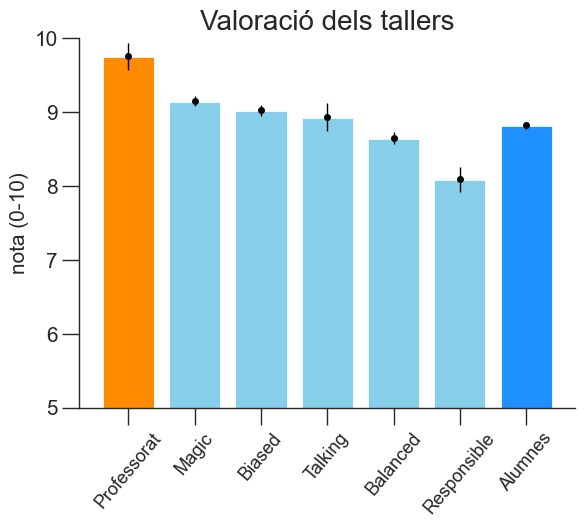

In [95]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([valoraciones['profes'][0], valoraciones['magic'][0], valoraciones['biased'][0], 
              valoraciones['talking'][0], valoraciones['balanced'][0],  valoraciones['responsible'][0],
              valoraciones['todos_alumnos'][0]])

e = np.array([valoraciones['profes'][1], valoraciones['magic'][1], valoraciones['biased'][1], 
              valoraciones['talking'][1], valoraciones['balanced'][1],  valoraciones['responsible'][1],
              valoraciones['todos_alumnos'][1]])

plt.bar(x, y, color='skyblue')
plt.bar(x[0], y[0], color='darkorange')
plt.bar(x[-1], y[-1], color='dodgerblue')
plt.errorbar(x, y, e, linestyle='None', marker='o', color='k', elinewidth=1, markersize=4)
plt.ylim(5,10)
plt.ylabel('nota (0-10)', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], 
           ['Professorat', 'Magic', 'Biased', 'Talking', 'Balanced', 'Responsible', 'Alumnes'],
          fontsize=13,
          rotation=50)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().tick_params(width=1)

plt.title('Valoració dels tallers', fontsize=20)
plt.show()